In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import datetime

In [69]:
pd.set_option('display.max_row', 50)
pd.set_option('display.max_column', 100)
plt.style.use('fivethirtyeight')

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    display(x)
    pd.set_option('display.max_row', 50)
    pd.set_option('display.max_column', 100)
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
def set_titles(title='', subtitle='', caption='', author='From Jonathan Ratschat', xlabel='', ylabel=''):
    x0, xmax = plt.xlim()
    y0, ymax = plt.ylim()
    data_width = xmax - x0
    data_height = ymax - y0
    plt.text(x0 + data_width * -0.05, y0 + data_height * 1.15, s = title, weight = 'bold', backgroundcolor = '#f0f0f0', fontsize = 25, alpha = 0.75)
    plt.text(x0 + data_width * -0.05, y0 + data_height * 1.06, s = subtitle, backgroundcolor = '#f0f0f0', fontsize = 19, alpha = 0.85, verticalalignment = 'bottom')
    plt.text(x0 + data_width * -0.05, y0 + data_height * -0.13, s = caption, rotation = 0, backgroundcolor = '#f0f0f0', fontsize = 14, alpha = 0.5)
    plt.text(x0 + data_width * 0.84, y0 + data_height * -0.13, s = author, rotation = 0, backgroundcolor = '#f0f0f0', fontsize = 14, alpha = 0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [4]:
# Load data
usnews = pd.read_pickle('data/usnews.pkl')
usnews = usnews.rename(columns = {'compoundSentiment':'Sentiment'})
breitbart = usnews[usnews.NewsProvider == 'Breitbart']
politico = usnews[usnews.NewsProvider == 'Politico']
axios = usnews[usnews.NewsProvider == 'Axios']
fivethirty = usnews[usnews.NewsProvider == 'FiveThirtyEight']
usnews

Title  \
0                            What we're watching in 2020   
1      Chief Justice Roberts says Americans may "take...   
2                               Trump's twin war threats   
3      Pollak: Welcome to 2020, the Year of the Good ...   
4      Warren Blames Unrest on Trump's 'Recklessness'...   
...                                                  ...   
31985               The Best Way to Help Schools Reopen    
31986  How Trump Mastered the Art of Telling History ...   
31987  Bush, McCain and Romney presidential staffers ...   
31988  GOP takes a third run at defining Republicans ...   
31989  ‘It’s playing into Trump’s hands’: Dems fear s...   

                                             Description  \
0      Trump's post-impeachment future, Big Tech regu...   
1      It reads as a mission statement ahead of Presi...   
2      They will truly test his diplomatic mix of blu...   
3      The year 2020 begins with incredible potential...   
4      Sen. Elizabeth Warren blamed President Trump f...   
...                                                  ...   
31985  Educators aren’t public health experts. If we ...   
31986  The Republican convention has glossed over the...   
31987  “We know Mitt and Joe share those same essenti...   
31988  After two days of dueling and at-time contradi...   
31989  Some Wisconsin Democrats worry that the images...   

                                                 Content  \
0      This is going to be a momentous presidential e...   
1      Supreme Court Chief Justice John Roberts warne...   
2      President Trump suddenly faces two global cris...   
3      The year 2020 begins with incredible potential...   
4      Sen. Elizabeth Warren (D-MA) on Tuesday blamed...   
...                                                  ...   
31985  The unfolding complexity of school reopening r...   
31986  Donald Trump, according to the first three nig...   
31987  Support for Joe Biden's White House bid is gro...   
31988  On Monday, the only Black GOP senator sought t...   
31989  KENOSHA, Wis. — Downtown buildings set ablaze ...   

                                                     URL        Date  \
0      https://www.axios.com/what-we-are-watching-202...  2020-01-01   
1      https://www.axios.com/chief-justice-john-rober...  2020-01-01   
2      https://www.axios.com/north-korea-iran-trump-w...  2020-01-01   
3      https://www.breitbart.com/2020-election/2019/1...  2020-01-01   
4      https://www.breitbart.com/middle-east/2019/12/...  2020-01-01   
...                                                  ...         ...   
31985  https://www.politico.com/news/agenda/2020/08/2...  2020-08-27   
31986  https://www.politico.com/news/magazine/2020/08...  2020-08-27   
31987  https://www.politico.com/news/2020/08/27/mitt-...  2020-08-27   
31988  https://www.politico.com/news/2020/08/27/gop-h...  2020-08-27   
31989  https://www.politico.com/news/2020/08/27/its-p...  2020-08-27   

                        Author  \
0      Jim VandeHei,Mike Allen   
1                Jacob Knutson   
2      Mike Allen,Jim VandeHei   
3               Joel B. Pollak   
4                 Hannah Bleau   
...                        ...   
31985            MARIO RAMIREZ   
31986            MICHAEL KRUSE   
31987                MAX COHEN   
31988                GABBY ORR   
31989          NATASHA KORECKI   

                                              Category NewsProvider  Year Day  \
0                                    Politics & Policy        Axios  2020  01   
1                                    Politics & Policy        Axios  2020  01   
2                                    Politics & Policy        Axios  2020  01   
3                         Politics,Media,2020 Election    Breitbart  2020  01   
4      Politics,National Security,Israel / Middle East    Breitbart  2020  01   
...                                                ...          ...   ...  ..   
31985                                          

In [75]:
datasets = [axios, breitbart, politico, fivethirty]
labels = ['Axios', 'Breitbart', 'Politico', 'FiveThirtyEight']
colors = ['blue', 'orange', 'red', 'green']

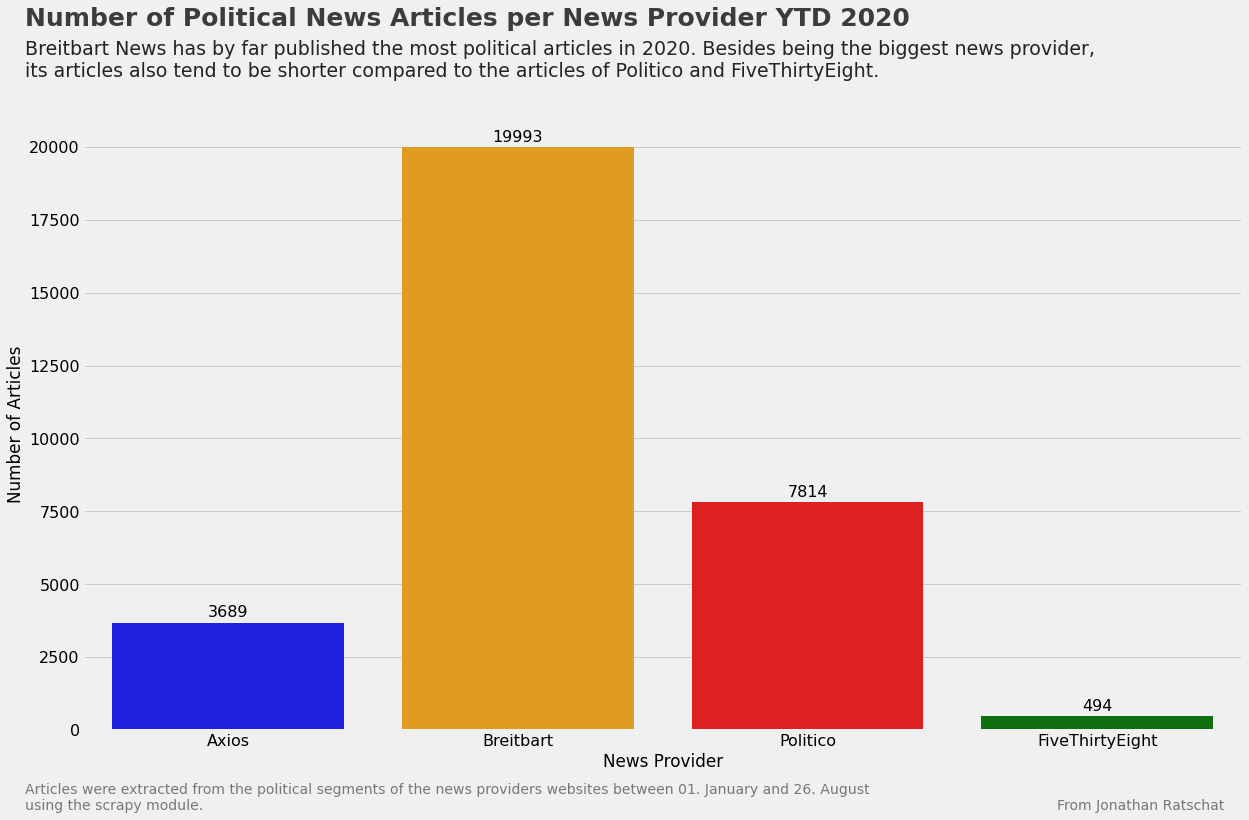

In [76]:
ax = sns.countplot(x = 'NewsProvider', data = usnews, palette= colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize = 16)

set_titles(title = 'Number of Political News Articles per News Provider YTD 2020',
           subtitle = 'Breitbart News has by far published the most political articles in 2020. Besides being the biggest news provider, \nits articles also tend to be shorter compared to the articles of Politico and FiveThirtyEight.',
           caption = 'Articles were extracted from the political segments of the news providers websites between 01. January and 26. August\nusing the scrapy module.',
           xlabel = 'News Provider',
           ylabel = 'Number of Articles')

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.savefig('visuals/Count_Articles.png', bbox_inches='tight')

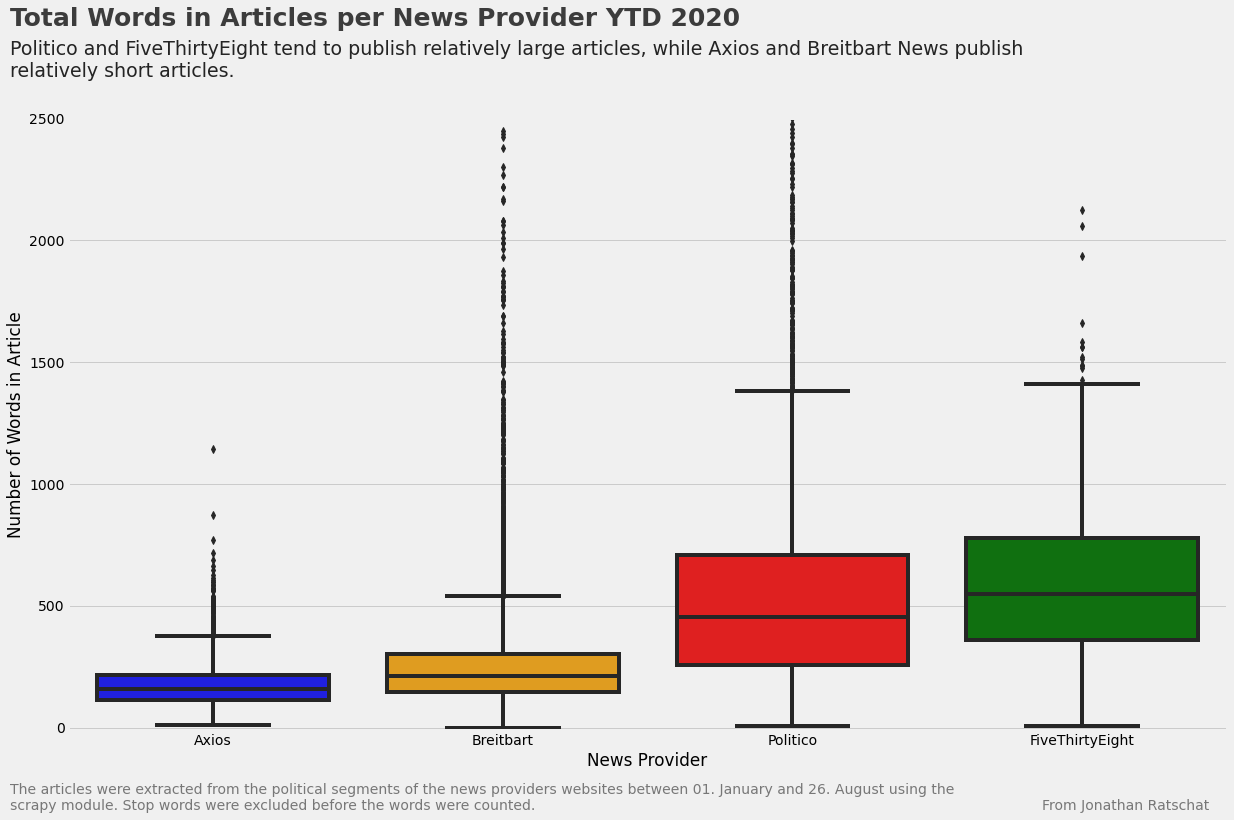

In [47]:
sns.boxplot(x = 'NewsProvider', y = 'Totalwords', data = usnews, palette= colors)
plt.ylim(-10, 2500)

set_titles(title = 'Total Words in Articles per News Provider YTD 2020',
           subtitle = 'Politico and FiveThirtyEight tend to publish relatively large articles, while Axios and Breitbart News publish \nrelatively short articles.',
           caption = 'The articles were extracted from the political segments of the news providers websites between 01. January and 26. August using the \nscrapy module. Stop words were excluded before the words were counted.',
           xlabel = 'News Provider',
           ylabel = 'Number of Words in Article')

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.savefig('visuals/Count_Words.png', bbox_inches='tight')

## Sentiment

### Vader Sentiment

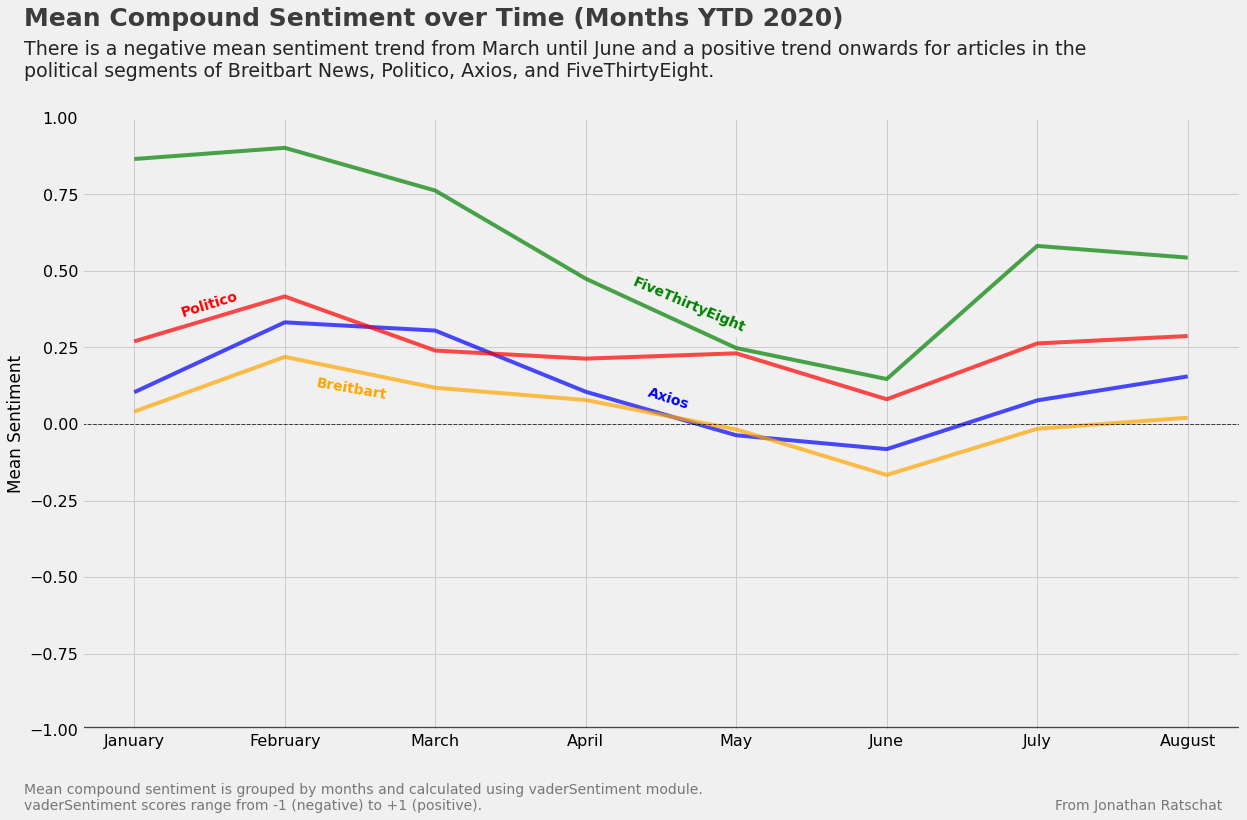

In [48]:
for dataset, label, color in zip(datasets, labels, colors):
    dataset_bydate = dataset.groupby('Month', as_index=False)
    ax = sns.lineplot(dataset_bydate.mean()['Month'], dataset_bydate.mean()['compoundSentiment'], color = color, alpha = 0.7)

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.set_xticklabels(labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])

plt.axhline(linewidth=1, color='black', linestyle='dashed', alpha = .7)
plt.axhline(y = -0.99, linewidth = 1.3, color = 'black', alpha = .7)
plt.ylim(-1, 1)

set_titles(title = 'Mean Compound Sentiment over Time (Months YTD 2020)',
           subtitle = 'There is a negative mean sentiment trend from March until June and a positive trend onwards for articles in the \npolitical segments of Breitbart News, Politico, Axios, and FiveThirtyEight.',
           caption = 'Mean compound sentiment is grouped by months and calculated using vaderSentiment module. \nvaderSentiment scores range from -1 (negative) to +1 (positive).',
           author = 'From Jonathan Ratschat',
           xlabel = '',
           ylabel = 'Mean Sentiment')

plt.text(x = 1.2, y = 0.08, s = 'Breitbart', color = 'orange', weight = 'bold', rotation = -10, backgroundcolor = '#f0f0f0')
plt.text(x = 0.3, y = 0.35, s = 'Politico', color = 'red', weight = 'bold', rotation = +17, backgroundcolor = '#f0f0f0')
plt.text(x = 3.4, y = 0.05, s = 'Axios', color = 'blue', weight = 'bold', rotation = -18, backgroundcolor = '#f0f0f0')
plt.text(x = 3.3, y = 0.3, s = 'FiveThirtyEight', color = 'green', weight = 'bold', rotation = -23, backgroundcolor = '#f0f0f0')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.savefig('visuals/Compound_Month.png', bbox_inches='tight')

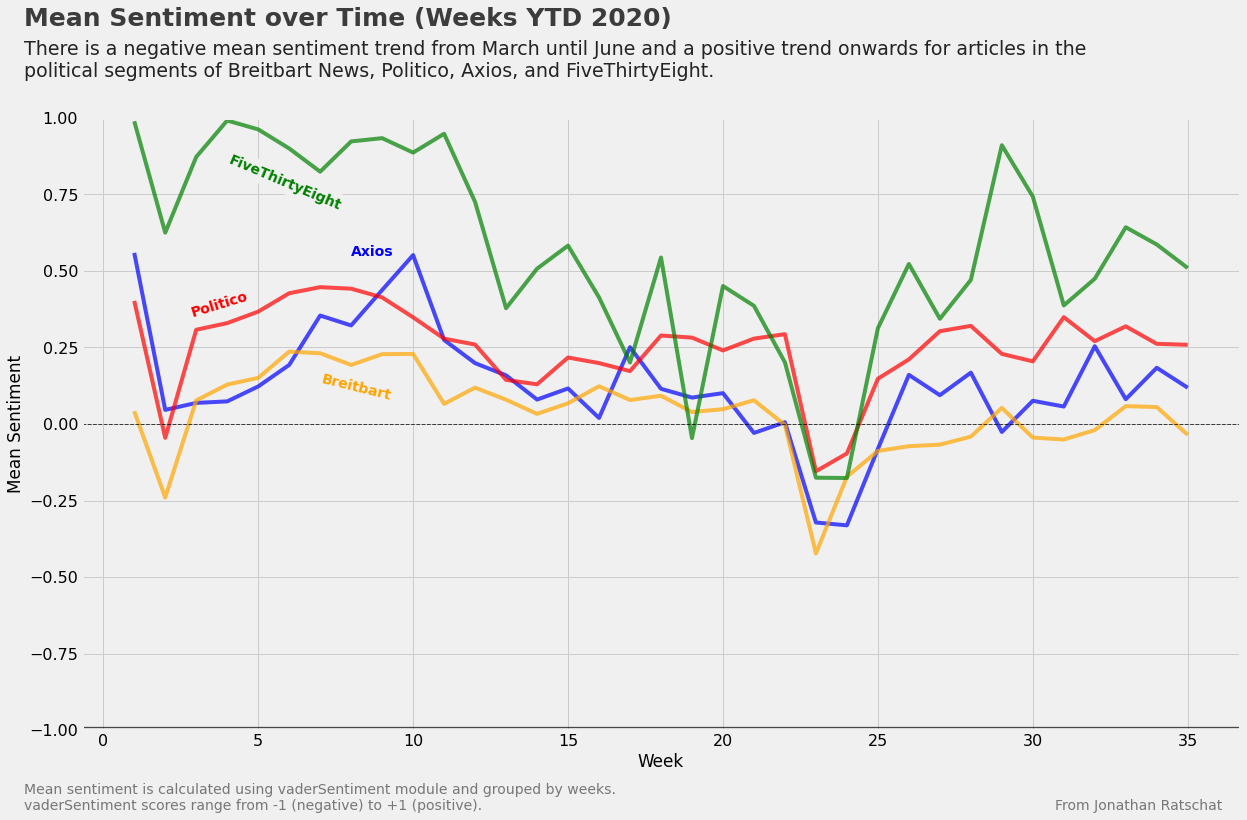

In [51]:
for dataset, label, color in zip(datasets, labels, colors):
    dataset_bydate = dataset.groupby('Week', as_index=False)
    ax = sns.lineplot(dataset_bydate.mean()['Week'], dataset_bydate.mean()['compoundSentiment'], color = color, alpha = 0.7)
    
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

plt.axhline(linewidth=1, color='black', linestyle='dashed', alpha = .7)
plt.axhline(y = -0.99, linewidth = 1.3, color = 'black', alpha = .7)
plt.ylim(-1, 1)

set_titles(title = 'Mean Sentiment over Time (Weeks YTD 2020)',
          subtitle = 'There is a negative mean sentiment trend from March until June and a positive trend onwards for articles in the \npolitical segments of Breitbart News, Politico, Axios, and FiveThirtyEight.',
          caption = 'Mean sentiment is calculated using vaderSentiment module and grouped by weeks. \nvaderSentiment scores range from -1 (negative) to +1 (positive).',
          author = 'From Jonathan Ratschat',
           xlabel = 'Week',
           ylabel = 'Mean Sentiment')

plt.text(x = 7, y = 0.08, s = 'Breitbart', color = 'orange', weight = 'bold', rotation = -14, backgroundcolor = '#f0f0f0')
plt.text(x = 2.8, y = 0.35, s = 'Politico', color = 'red', weight = 'bold', rotation = +17, backgroundcolor = '#f0f0f0')
plt.text(x = 8, y = 0.55, s = 'Axios', color = 'blue', weight = 'bold', rotation = 0, backgroundcolor = '#f0f0f0')
plt.text(x = 4, y = 0.7, s = 'FiveThirtyEight', color = 'green', weight = 'bold', rotation = -23, backgroundcolor = '#f0f0f0')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.savefig('visuals/Compound_Week.png', bbox_inches='tight')

### Polarity

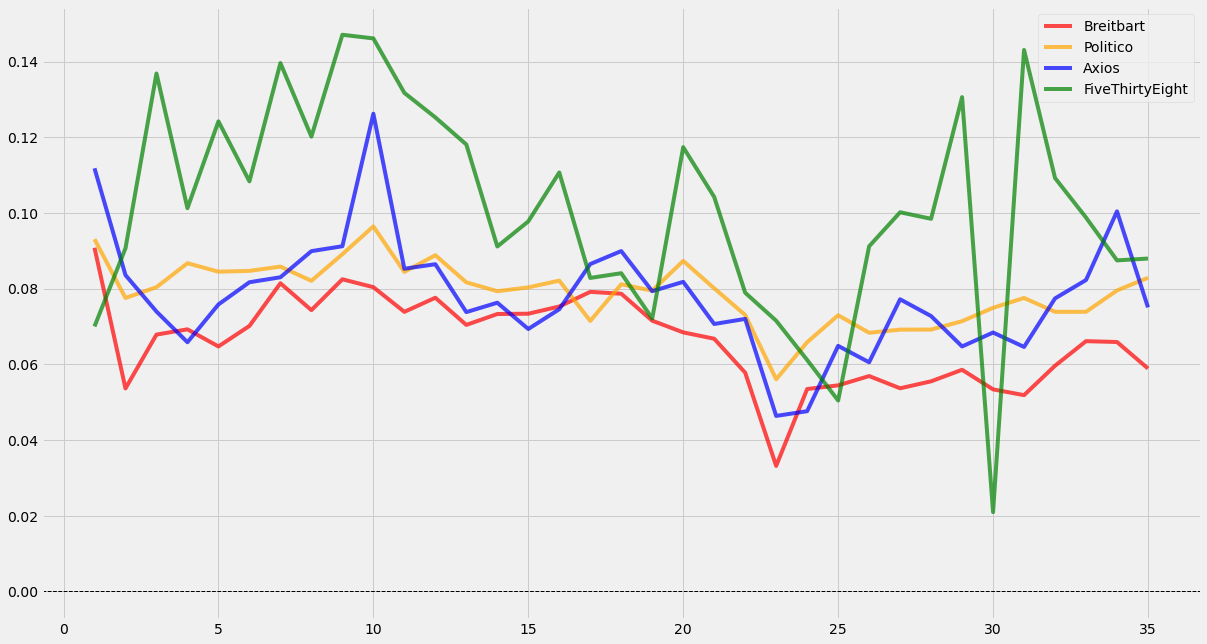

In [133]:
for dataset, label, color in zip(datasets, labels, colors):
    dataset_bydate = dataset.groupby('Week', as_index=False)
    plt.plot(dataset_bydate.mean()['Week'], dataset_bydate.mean()['polarity'], label = label, color = color, alpha = 0.7)
    #plt.fill_between(dataset_bydate.mean()['Week'], dataset_bydate.mean()['polarity']-dataset_bydate.var()['polarity'], dataset_bydate.mean()['polarity']+dataset_bydate.var()['polarity'], alpha=0.2, facecolor='blue')

plt.axhline(linewidth=1, color='black', linestyle='dashed')
plt.legend(loc='upper right')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

### Subjectivity

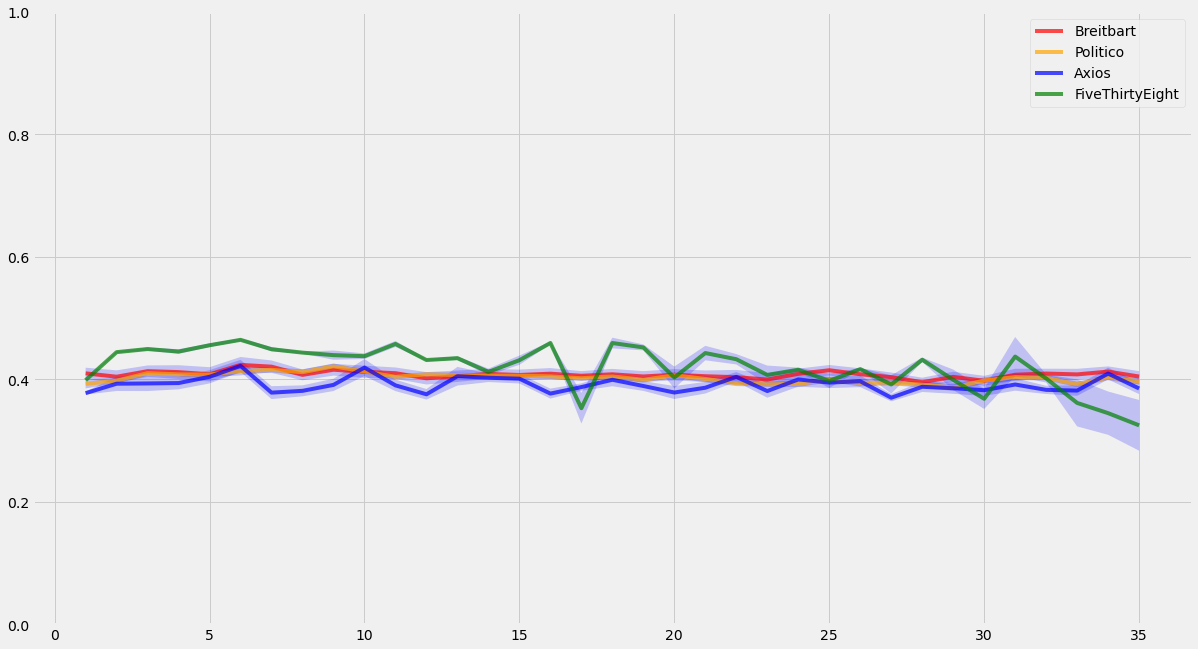

In [134]:
for dataset, label, color in zip(datasets, labels, colors):
    dataset_bydate = dataset.groupby('Week', as_index=False)
    plt.plot(dataset_bydate.mean()['Week'], dataset_bydate.mean()['subjectivity'], label = label, color = color, alpha = 0.7)
    plt.fill_between(dataset_bydate.mean()['Week'], dataset_bydate.mean()['subjectivity']-dataset_bydate.var()['subjectivity'], dataset_bydate.mean()['subjectivity']+dataset_bydate.var()['subjectivity'], alpha=0.2, facecolor='blue')

plt.legend(loc='upper right')
plt.ylim(0, 1)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

## Topics

In [34]:
# Load lda model
from gensim.models import LdaModel
ldamodel =  LdaModel.load('ldamodel/lda.model')

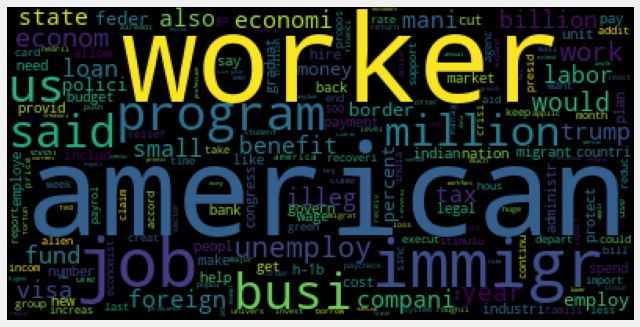

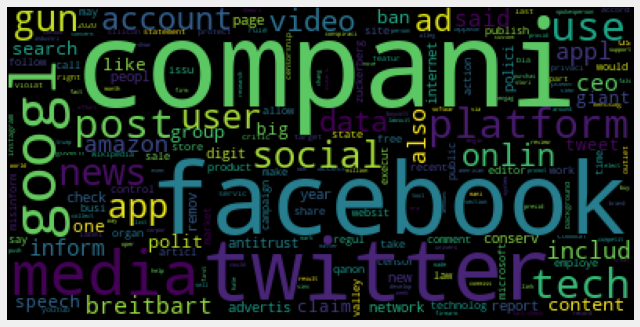

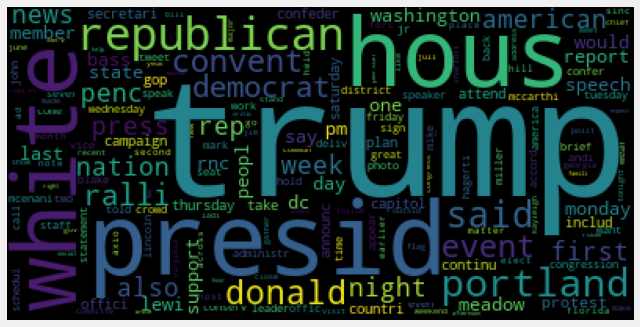

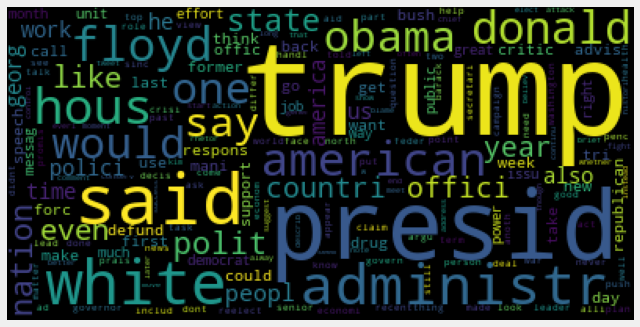

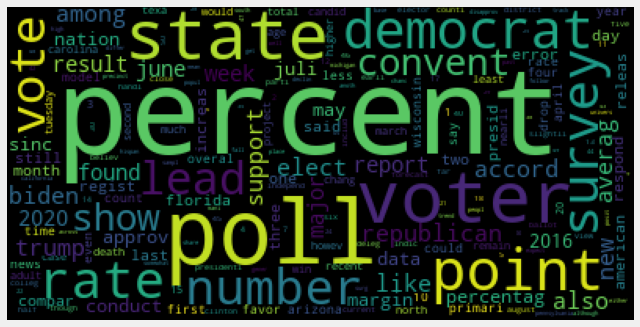

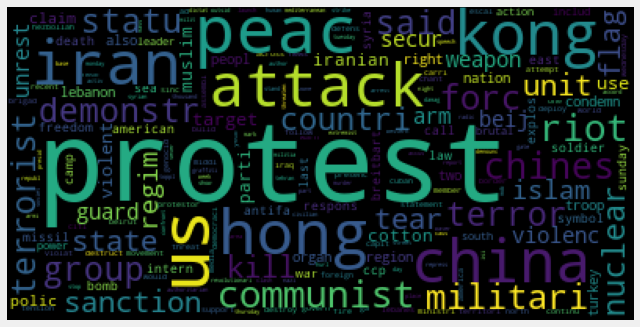

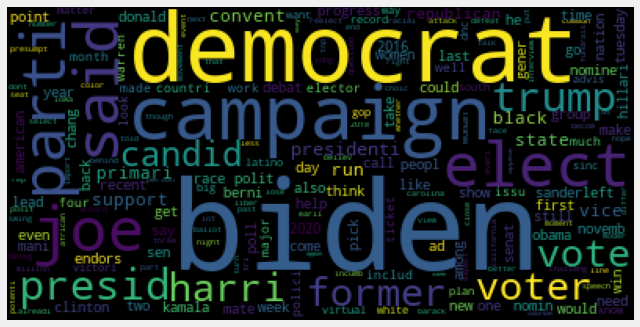

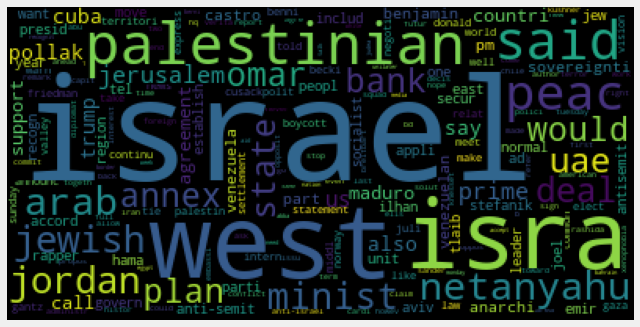

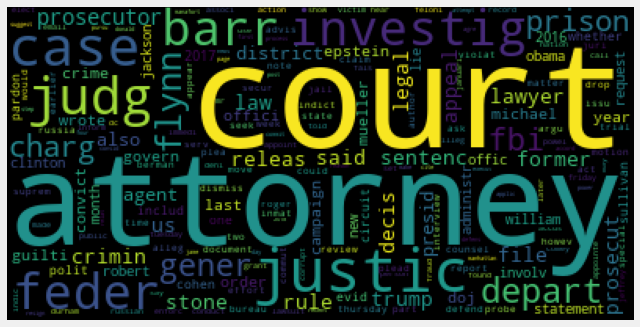

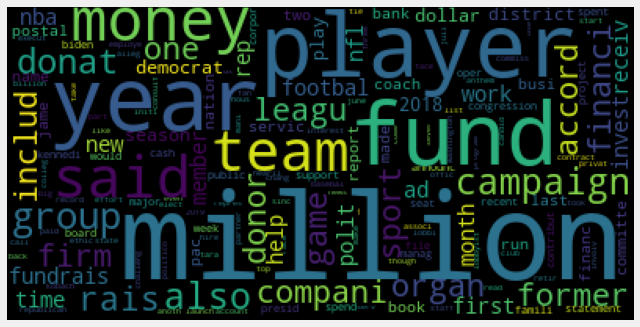

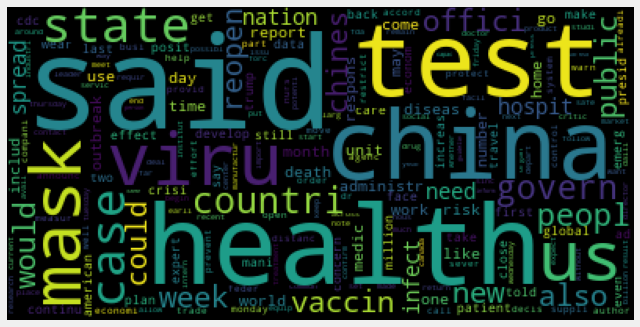

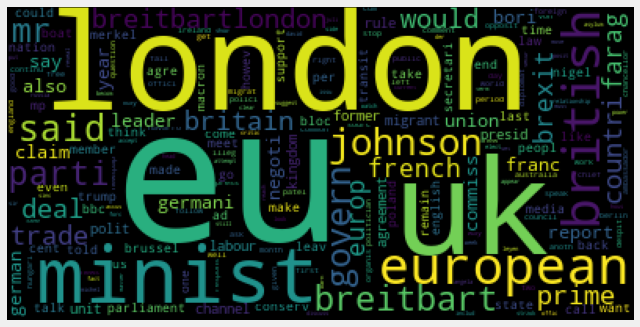

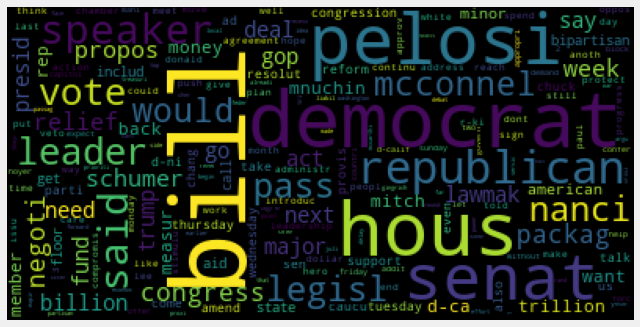

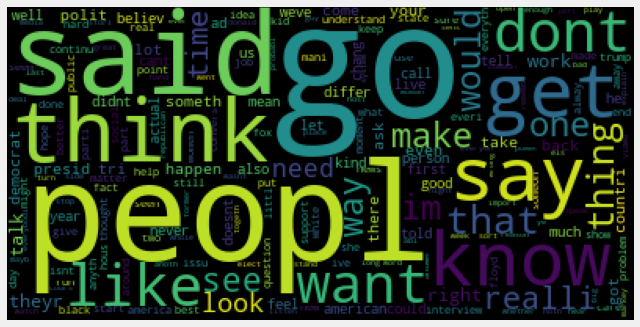

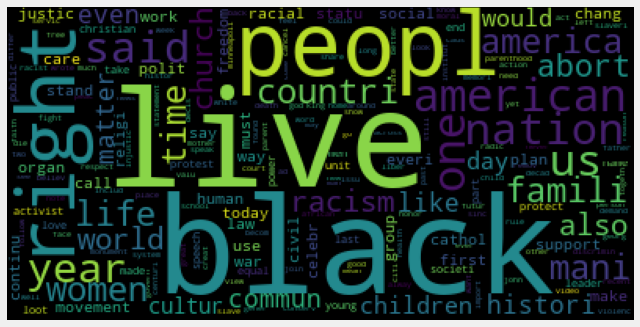

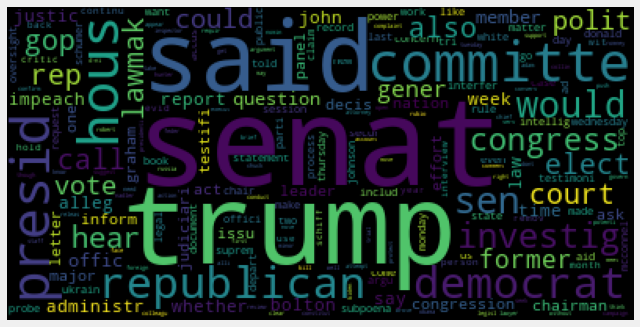

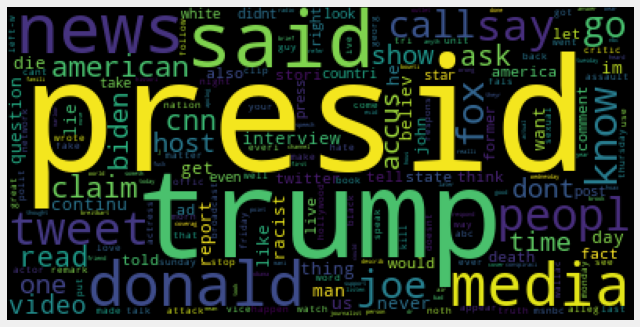

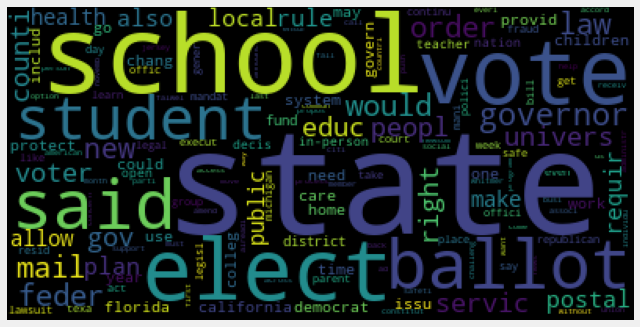

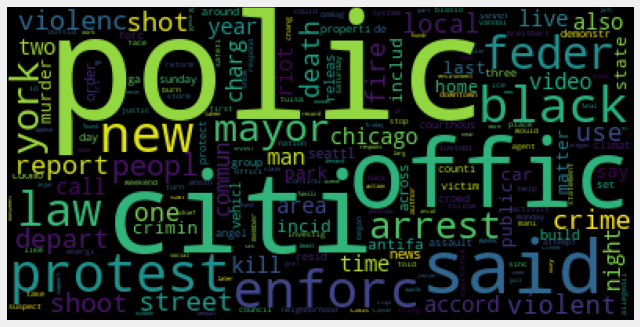

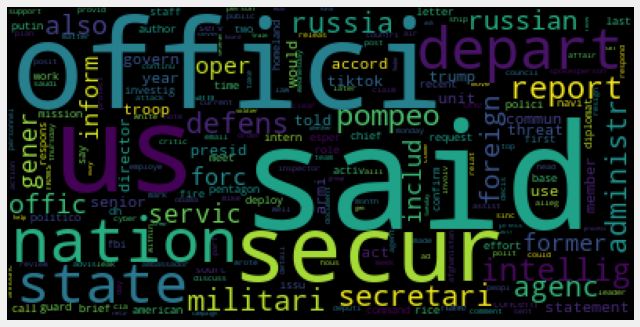

In [42]:
from wordcloud import WordCloud

for t in range(ldamodel.num_topics):
    plt.figure(figsize=[10,10])
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    #plt.title("Topic #" + str(t))
    plt.savefig("visuals/Topic #" + str(t) + ".png", format="png", bbox_inches='tight')
    plt.show()

In [40]:
# Group top articles under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = usnews.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
#sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
print_full(sent_topics_sorteddf_mallet[["Dominant_Topic", 
                                        "Content", 
                                        "Topic_Perc_Contrib", 
                                        "Title", 
                                        "NewsProvider", 
                                        "Datetime"]]#[(sent_topics_sorteddf_mallet["Dominant_Topic"] == 5) #&
                                                     #(sent_topics_sorteddf_mallet['Datetime'] >= '2020-05-23') &
                                                     #(sent_topics_sorteddf_mallet['Datetime'] <= '2020-06-11') & 
                                                     #(sent_topics_sorteddf_mallet['NewsProvider'] == 'Breitbart')]
                                                     .head(20))

Dominant_Topic  \
0                  0.00   
1                  1.00   
2                  2.00   
3                  3.00   
4                  4.00   
5                  5.00   
6                  6.00   
7                  7.00   
8                  8.00   
9                  9.00   
10                10.00   
11                11.00   
12                12.00   
13                13.00   
14                14.00   
15                15.00   
16                16.00   
17                17.00   
18                18.00   
19                19.00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## Regression estimation

In [8]:
from statsmodels.formula.api import ols
model = ols('Sentiment ~ C(NewsProvider)', data = usnews)
results = model.fit(cov_type='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          6.45e-129
Time:                        10:59:50   Log-Likelihood:                -40289.
No. Observations:               31990   AIC:                         8.059e+04
Df Residuals:                   31986   BIC:                         8.062e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [40]:
from statsmodels.formula.api import ols
model = ols('Sentiment ~ C(Dominant_Topic) + C(NewsProvider)', data = usnews)
results = model.fit(cov_type='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     330.0
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:58:42   Log-Likelihood:                -38194.
No. Observations:               31990   AIC:                         7.643e+04
Df Residuals:                   31967   BIC:                         7.663e+04
Df Model:                          22                                         
Covariance Type:                  HC1                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [47]:
from statsmodels.formula.api import ols
model = ols('Sentiment ~ C(Dominant_Topic) * C(NewsProvider)', data = usnews)
results = model.fit(cov_type='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1326.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:59:24   Log-Likelihood:                -38101.
No. Observations:               31990   AIC:                         7.636e+04
Df Residuals:                   31913   BIC:                         7.700e+04
Df Model:                          76                                         
Covariance Type:                  HC1                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\envs\Patreon\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 79, but rank is 74
  'rank is %d' % (J, J_), ValueWarning)


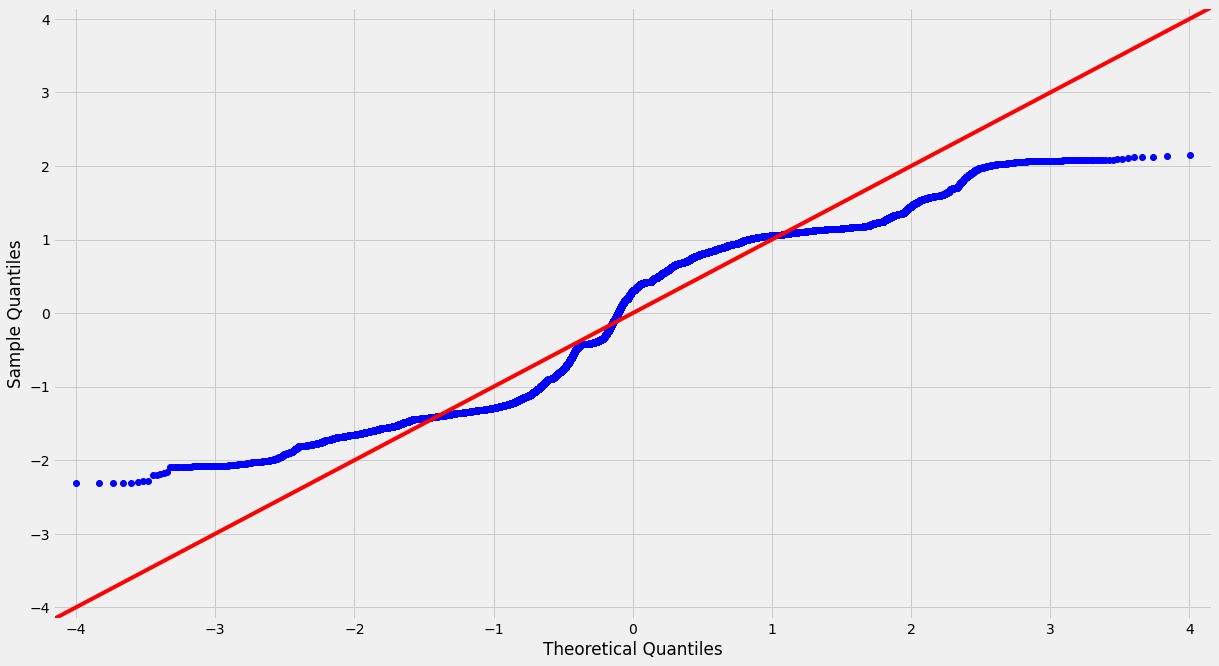

In [37]:
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(results.resid, stats.t, fit=True, line='45')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

In [38]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(results.resid, results.model.exog)
print(dict(zip(labels, white_test)))

bp_test = het_breuschpagan(results.resid, results.model.exog)
print(dict(zip(labels, bp_test)))

{'LM Statistic': 2066.7453429193383, 'LM-Test p-value': 0.0, 'F-Statistic': 29.002282534031643, 'F-Test p-value': 0.0}
{'LM Statistic': 2083.603319033434, 'LM-Test p-value': 0.0, 'F-Statistic': 29.255329302806153, 'F-Test p-value': 0.0}


In [28]:
timecount = usnews[['Title', 'NewsProvider', 'Datetime', 'Dominant_Topic']].groupby(['Datetime', 'Dominant_Topic', 'NewsProvider'], as_index=False).count()

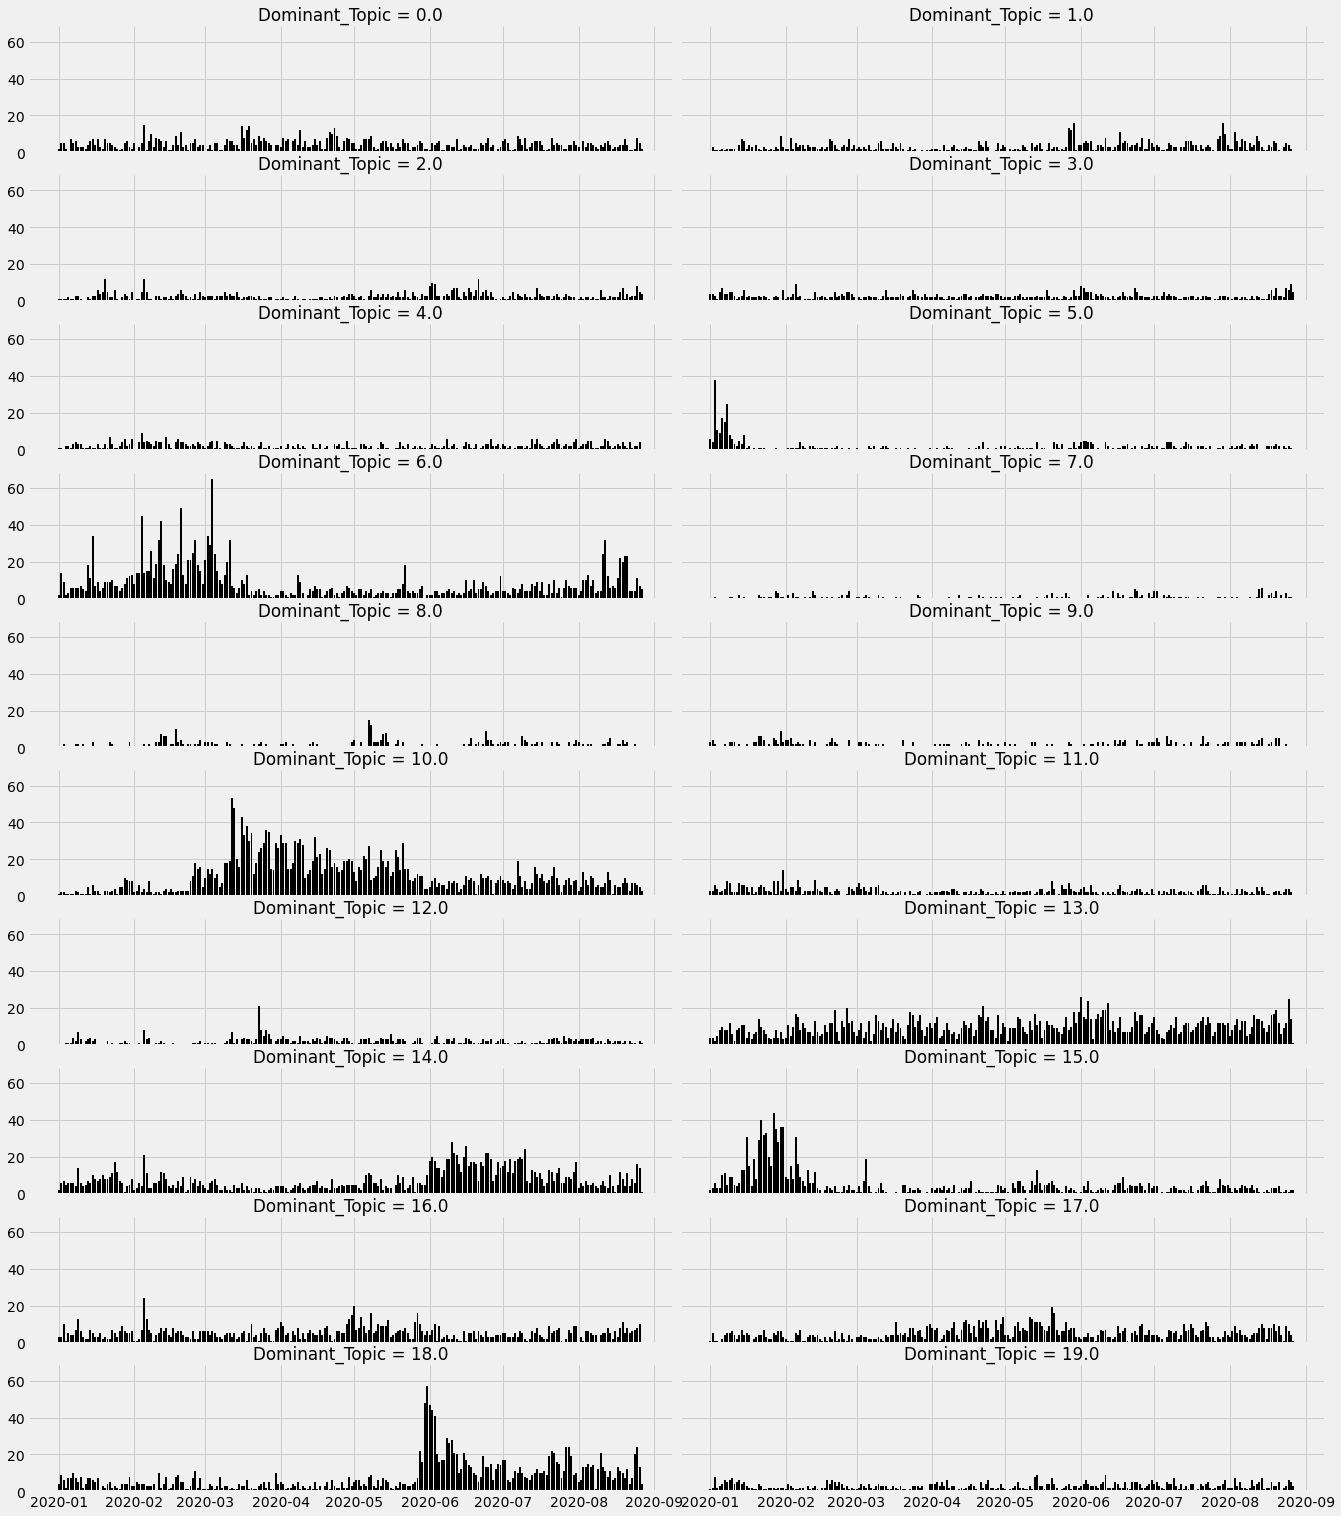

In [35]:
g = sns.FacetGrid(timecount, col='Dominant_Topic', col_wrap=2, height=4, aspect = 4.625)
g = g.map(plt.bar, 'Datetime', 'Title', color = 'black')
g.set(xlabel='', ylabel='')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 21, forward=True)
plt.savefig('visuals/Topics_overtime.png', bbox_inches='tight')

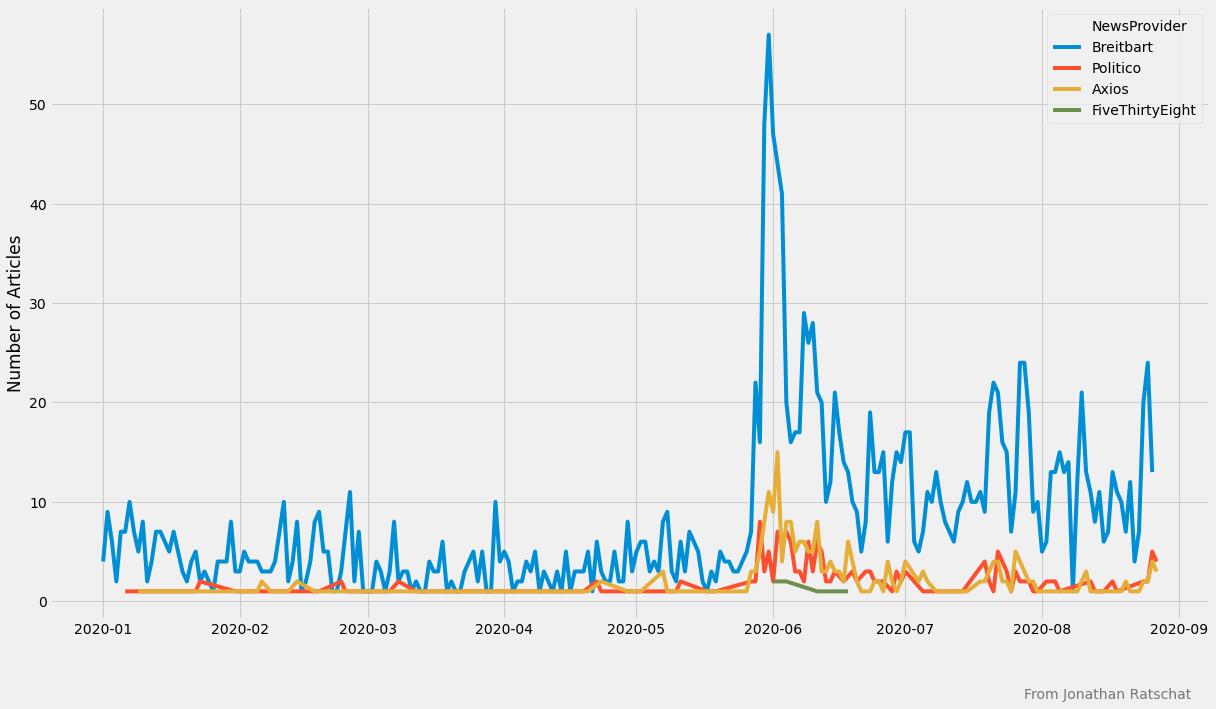

In [30]:
sns.lineplot('Datetime', 'Title', hue = 'NewsProvider', data = timecount[timecount.Dominant_Topic == 18])

set_titles(title = '',
           subtitle = '',
           caption = '',
           xlabel = '',
           ylabel = 'Number of Articles')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)